# 1.2 Electron Transport in molec. dingenskirchens

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Unterpunkt b: Implementing Gauss Seidel & Testing
Also basically wird mit dem Gauss Seidel Algorythmus ein Gleichungssystem der Form Ax=b für x gelöst, wobei A die zufäll

(100, 100)
(100,)


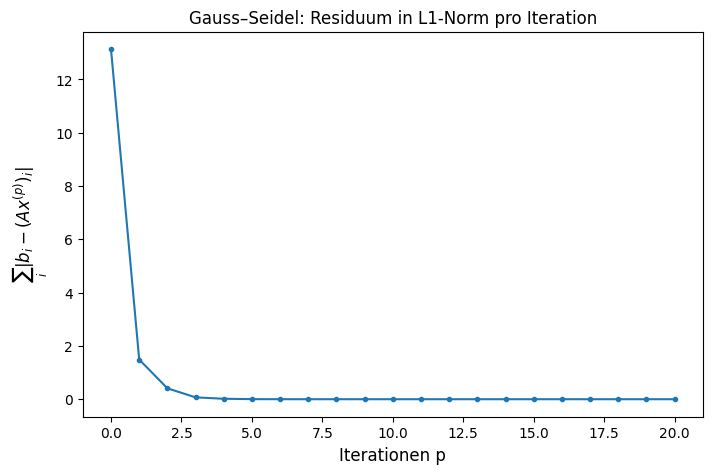

In [17]:
# Erstellen einer zufälligen 100x100 Matrix A und Vektor b, die dem Gauss Seidel Verfahren genügen
# strikte Diagonale Dominanz der Matrix, was die Konvergenz garantiert
n = 100
X = np.random.rand(n, n)
A= X@X.T 
np.fill_diagonal(A, np.sum(np.abs(A), axis=1) + 1)  # Diagonalelemente ersetezn durch Summe der Zeilen plus 1 (strikte Diagonale Dominanz)
b = np.random.rand(n)


print(np.shape(A))
print(np.shape(b)) 

# Definiere Gauss-Seidel-Verfahrens
def gauss_seidel(A, b, max_iters=1000, tol=1e-10): # max_iters: maximale Anzahl an Iterationen, tol: Toleranz für Abbruch (um Endlosschleifen zu vermeiden)
    n = b.size
    x = np.zeros_like(b) # Anfangslösung x^(0) = 0 vektor

    errs = [] # Liste zur Speicherung der Fehlerwerte pro Iteration, anfangs leer
    for _ in range(max_iters): # Diese Schleife ersetzt immer en ganzen Vektor x^(p) durch x^(p+1)
        x_old = x.copy()
        for i in range(n): # Diese Schleife berechnet die i-te Komponente von x^(p+1) 
            s1 = A[i, :i] @ x[:i]          # Summe über neue Werte j<i (Berechnet mit Skalarprodukt weil SP eine Summe ist)
            s2 = A[i, i+1:] @ x_old[i+1:]  # Summe über alte Werte j>i
            x[i] = (b[i] - s1 - s2) / A[i, i] # Update der i-ten Komponente von x

        r = b - A @ x # Residuum r = b - A x^(p)
        err = np.sum(np.abs(r))     # geforderte Größe: Summe |b - A x^(p)| als Einzelwert
        errs.append(err) # Fehlerwert zur Liste der Fehlerwerte errs hinzufügen
        if err < tol: # wenn Fehler kleiner als Toleranz, Abbruch
            break
    return x, np.array(errs)

x, errs = gauss_seidel(A, b, max_iters=1000, tol=1e-12)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(errs, marker='o', linestyle='-', markersize=3)
#plt.yscale('log')  # Logarithmische Skalierung der y-Achse wie in Angabe empfohlen
plt.xlabel('Iterationen p', fontsize=12)
plt.ylabel(r'$\sum_i |b_i - (A x^{(p)})_i|$', fontsize=12)
plt.title('Gauss–Seidel: Residuum in L1-Norm pro Iteration')
plt.show()